In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import scipy
from scipy import stats
from statannot import add_stat_annotation
from anndata import AnnData
import scanpy as sc

In [2]:
## Customizing plot
commonFontsize=8
def config_rcparams():
    plt.rcParams['font.family'] = ['sans-serif']
    plt.rcParams['font.sans-serif'] = ['arial']
    plt.rcParams['font.size'] = commonFontsize
    plt.rcParams['axes.labelsize'] = commonFontsize
    plt.rcParams['xtick.labelsize'] = commonFontsize
    plt.rcParams['ytick.labelsize'] = commonFontsize
    plt.rcParams['axes.titlesize'] = commonFontsize
    plt.rcParams['svg.fonttype'] = 'none'
    plt.rcParams['mathtext.fontset'] = 'custom'
    plt.rcParams['mathtext.cal'] = 'arial'
    plt.rcParams['mathtext.rm'] = 'arial'
    plt.rcParams['axes.edgecolor'] = 'black'
    plt.rcParams['ytick.color'] = 'black'
    plt.rcParams['axes.linewidth'] = 0.7
    plt.rcParams['xtick.major.width'] = 0.7
    plt.rcParams['ytick.major.width'] = 0.7
    plt.rcParams['xtick.major.size' ] = 3
    plt.rcParams['ytick.major.size' ] = 3
    plt.rcParams['text.usetex' ] = False
config_rcparams()

###  Cancer cell lines treted with TNF alpha and TGF beta

### 1. Analysis of cell lines treated with TGF-beta

In [3]:
input_path3 = "data/time_course/"
gene_data_frame4=pd.read_csv(input_path3+'GSE147405_A549_TGFB1_TimeCourse_UMI_matrix.csv.gz',index_col=0)#
gene_data_frame4_df=gene_data_frame4
adata = sc.AnnData(gene_data_frame4_df.T)
X_norm = sc.pp.normalize_total(adata, target_sum=1, inplace=False)['X']
normdf=pd.DataFrame(X_norm,index=gene_data_frame4_df.T.index,columns=gene_data_frame4_df.T.columns)

gene_data_frame4ann=pd.read_csv(input_path3+'GSE147405_A549_TGFB1_TimeCourse_metadata.csv.gz',index_col=0)

temp=pd.merge(normdf,gene_data_frame4ann,left_index=True, right_index=True)

temp2=temp[['CellLine', 'Treatment', 'Time','PSMB8','PSMB9','PSMB10','PSMB5','PSMB6','PSMB7']].groupby(['Time']).mean()

re_index=['0d','8h','1d', '3d','7d','8h_rm','1d_rm','3d_rm']
temp3=temp2.reindex(re_index)

temp3['immunopeoteasome_avaerage']=(1/3)*(temp3['PSMB8']+temp3['PSMB9']+temp3['PSMB10'])
temp3['constitutive_proteasome_avaerage']=(1/3)*(temp3['PSMB5']+temp3['PSMB6']+temp3['PSMB7'])

temp3['immuno_proteasome_change_ratio']=temp3['immunopeoteasome_avaerage']/temp3['immunopeoteasome_avaerage'][0]
temp3['const_proteasome_change_ratio']=temp3['constitutive_proteasome_avaerage']/temp3['constitutive_proteasome_avaerage'][0]
temp3_A549_TGFB1=temp3

gene_data_frame4=pd.read_csv(input_path3+'GSE147405_OVCA420_TGFB1_TimeCourse_UMI_matrix.csv.gz',index_col=0)#
gene_data_frame4_df=gene_data_frame4
adata = sc.AnnData(gene_data_frame4_df.T)
X_norm = sc.pp.normalize_total(adata, target_sum=1, inplace=False)['X']
normdf=pd.DataFrame(X_norm,index=gene_data_frame4_df.T.index,columns=gene_data_frame4_df.T.columns)

gene_data_frame4ann=pd.read_csv(input_path3+'GSE147405_OVCA420_TGFB1_TimeCourse_metadata.csv.gz',index_col=0)

temp=pd.merge(normdf,gene_data_frame4ann,left_index=True, right_index=True)
temp2=temp[['CellLine', 'Treatment', 'Time','PSMB8','PSMB9','PSMB10','PSMB5','PSMB6','PSMB7']].groupby(['Time']).mean()

re_index=['0d','8h','1d', '3d','7d','8h_rm','1d_rm','3d_rm']
temp3=temp2.reindex(re_index)

temp3['immunopeoteasome_avaerage']=(1/3)*(temp3['PSMB8']+temp3['PSMB9']+temp3['PSMB10'])
temp3['constitutive_proteasome_avaerage']=(1/3)*(temp3['PSMB5']+temp3['PSMB6']+temp3['PSMB7'])

temp3['immuno_proteasome_change_ratio']=temp3['immunopeoteasome_avaerage']/temp3['immunopeoteasome_avaerage'][0]
temp3['const_proteasome_change_ratio']=temp3['constitutive_proteasome_avaerage']/temp3['constitutive_proteasome_avaerage'][0]
temp3_OVCA420_TGFB1=temp3



gene_data_frame4=pd.read_csv(input_path3+'GSE147405_DU145_TGFB1_TimeCourse_UMI_matrix.csv.gz',index_col=0)#
gene_data_frame4_df=gene_data_frame4
adata = sc.AnnData(gene_data_frame4_df.T)
X_norm = sc.pp.normalize_total(adata, target_sum=1, inplace=False)['X']
normdf=pd.DataFrame(X_norm,index=gene_data_frame4_df.T.index,columns=gene_data_frame4_df.T.columns)

gene_data_frame4ann=pd.read_csv(input_path3+'GSE147405_DU145_TGFB1_TimeCourse_metadata.csv.gz',index_col=0)

temp=pd.merge(normdf,gene_data_frame4ann,left_index=True, right_index=True)
temp2=temp[['CellLine', 'Treatment', 'Time','PSMB8','PSMB9','PSMB10','PSMB5','PSMB6','PSMB7']].groupby(['Time']).mean()

re_index=['0d','8h','1d', '3d','7d','8h_rm','1d_rm','3d_rm']
temp3=temp2.reindex(re_index)

temp3['immunopeoteasome_avaerage']=(1/3)*(temp3['PSMB8']+temp3['PSMB9']+temp3['PSMB10'])
temp3['constitutive_proteasome_avaerage']=(1/3)*(temp3['PSMB5']+temp3['PSMB6']+temp3['PSMB7'])
temp3['ratio_immuno_constitutive']=temp3['immunopeoteasome_avaerage']/temp3['constitutive_proteasome_avaerage']
temp3['immuno_proteasome_change_ratio']=temp3['immunopeoteasome_avaerage']/temp3['immunopeoteasome_avaerage'][0]
temp3['const_proteasome_change_ratio']=temp3['constitutive_proteasome_avaerage']/temp3['constitutive_proteasome_avaerage'][0]
temp3_DU145_TGFB1=temp3


 ### 2. Analysis of cell lines treated with TNF alpha

In [4]:
gene_data_frame4=pd.read_csv(input_path3+'GSE147405_A549_TNF_TimeCourse_UMI_matrix.csv.gz',index_col=0)
gene_data_frame4_df=gene_data_frame4
adata = sc.AnnData(gene_data_frame4_df.T)
X_norm = sc.pp.normalize_total(adata, target_sum=1, inplace=False)['X']
normdf=pd.DataFrame(X_norm,index=gene_data_frame4_df.T.index,columns=gene_data_frame4_df.T.columns)

gene_data_frame4ann=pd.read_csv(input_path3+'GSE147405_A549_TNF_TimeCourse_metadata.csv.gz',index_col=0)
temp=pd.merge(normdf,gene_data_frame4ann,left_index=True, right_index=True)
temp2=temp[['CellLine', 'Treatment', 'Time','PSMB8','PSMB9','PSMB10','PSMB5','PSMB6','PSMB7']].groupby(['Time']).mean()
re_index=['0d','8h','1d', '3d','7d','8h_rm','1d_rm','3d_rm']
temp3=temp2.reindex(re_index)
temp3['immunopeoteasome_avaerage']=(1/3)*(temp3['PSMB8']+temp3['PSMB9']+temp3['PSMB10'])
temp3['constitutive_proteasome_avaerage']=(1/3)*(temp3['PSMB5']+temp3['PSMB6']+temp3['PSMB7'])
temp3['immuno_proteasome_change_ratio']=temp3['immunopeoteasome_avaerage']/temp3['immunopeoteasome_avaerage'][0]
temp3['const_proteasome_change_ratio']=temp3['constitutive_proteasome_avaerage']/temp3['constitutive_proteasome_avaerage'][0]
temp3_A549_TNF=temp3

gene_data_frame4=pd.read_csv(input_path3+'GSE147405_DU145_TNF_TimeCourse_UMI_matrix.csv.gz',index_col=0)
gene_data_frame4_df=gene_data_frame4
adata = sc.AnnData(gene_data_frame4_df.T)
X_norm = sc.pp.normalize_total(adata, target_sum=1, inplace=False)['X']
normdf=pd.DataFrame(X_norm,index=gene_data_frame4_df.T.index,columns=gene_data_frame4_df.T.columns)

gene_data_frame4ann=pd.read_csv(input_path3+'GSE147405_DU145_TNF_TimeCourse_metadata.csv.gz',index_col=0)
temp=pd.merge(normdf,gene_data_frame4ann,left_index=True, right_index=True)
temp2=temp[['CellLine', 'Treatment', 'Time','PSMB8','PSMB9','PSMB10','PSMB5','PSMB6','PSMB7']].groupby(['Time']).mean()
re_index=['0d','8h','1d', '3d','7d','8h_rm','1d_rm','3d_rm']
temp3=temp2.reindex(re_index)
temp3['immunopeoteasome_avaerage']=(1/3)*(temp3['PSMB8']+temp3['PSMB9']+temp3['PSMB10'])
temp3['constitutive_proteasome_avaerage']=(1/3)*(temp3['PSMB5']+temp3['PSMB6']+temp3['PSMB7'])
temp3['immuno_proteasome_change_ratio']=temp3['immunopeoteasome_avaerage']/temp3['immunopeoteasome_avaerage'][0]
temp3['const_proteasome_change_ratio']=temp3['constitutive_proteasome_avaerage']/temp3['constitutive_proteasome_avaerage'][0]
temp3_DU145_TNF=temp3


gene_data_frame4=pd.read_csv(input_path3+'GSE147405_OVCA420_TNF_TimeCourse_UMI_matrix.csv.gz',index_col=0)#
gene_data_frame4_df=gene_data_frame4
adata = sc.AnnData(gene_data_frame4_df.T)
X_norm = sc.pp.normalize_total(adata, target_sum=1, inplace=False)['X']
normdf=pd.DataFrame(X_norm,index=gene_data_frame4_df.T.index,columns=gene_data_frame4_df.T.columns)

gene_data_frame4ann=pd.read_csv(input_path3+'GSE147405_OVCA420_TNF_TimeCourse_metadata.csv.gz',index_col=0)
temp=pd.merge(normdf,gene_data_frame4ann,left_index=True, right_index=True)
temp2=temp[['CellLine', 'Treatment', 'Time','PSMB8','PSMB9','PSMB10','PSMB5','PSMB6','PSMB7']].groupby(['Time']).mean()
re_index=['0d','8h','1d', '3d','7d','8h_rm','1d_rm','3d_rm']
temp3=temp2.reindex(re_index)
temp3['immunopeoteasome_avaerage']=(1/3)*(temp3['PSMB8']+temp3['PSMB9']+temp3['PSMB10'])
temp3['constitutive_proteasome_avaerage']=(1/3)*(temp3['PSMB5']+temp3['PSMB6']+temp3['PSMB7'])
temp3['immuno_proteasome_change_ratio']=temp3['immunopeoteasome_avaerage']/temp3['immunopeoteasome_avaerage'][0]
temp3['const_proteasome_change_ratio']=temp3['constitutive_proteasome_avaerage']/temp3['constitutive_proteasome_avaerage'][0]
temp3_OVCA420_TNF=temp3


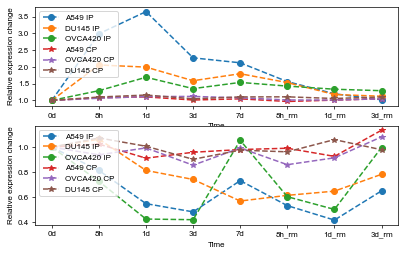

In [5]:
## Relative changes in the IP and CP expression level under TNF-alpha and TGFB1 treatment
temp3_A549_TNF_1=temp3_A549_TNF[['immuno_proteasome_change_ratio','const_proteasome_change_ratio']]
temp3_A549_TNF_1.columns=['TNF_A549_immuno','TNF_A549_const']
temp3_OVCA420_TNF_1=temp3_OVCA420_TNF[['immuno_proteasome_change_ratio','const_proteasome_change_ratio']]
temp3_OVCA420_TNF_1.columns=['TNF_OVCA420_immuno','TNF_OVCA420_const']
temp3_DU145_TNF_1=temp3_DU145_TNF[['immuno_proteasome_change_ratio','const_proteasome_change_ratio']]
temp3_DU145_TNF_1.columns=['TNF_DU145_immuno','TNF_DU145_const']

temp3_A549_TGFB1_1=temp3_A549_TGFB1[['immuno_proteasome_change_ratio','const_proteasome_change_ratio']]
temp3_A549_TGFB1_1.columns=['TGFB1_A549_immuno','TGFB1_A549_const']
temp3_OVCA420_TGFB1_1=temp3_OVCA420_TGFB1[['immuno_proteasome_change_ratio','const_proteasome_change_ratio']]
temp3_OVCA420_TGFB1_1.columns=['TGFB1_OVCA420_immuno','TGFB1_OVCA420_const']
temp3_DU145_TGFB1_1=temp3_DU145_TGFB1[['immuno_proteasome_change_ratio','const_proteasome_change_ratio']]
temp3_DU145_TGFB1_1.columns=['TGFB1_DU145_immuno','TGFB1_DU145_const']

final_df=pd.concat([temp3_A549_TNF_1,temp3_OVCA420_TNF_1,temp3_DU145_TNF_1,temp3_A549_TGFB1_1,temp3_OVCA420_TGFB1_1,temp3_DU145_TGFB1_1],axis=1)

fig, axes = plt.subplots(2, 1, figsize=(6.5, 4))
axes[0].plot(final_df['TNF_A549_immuno'],'--o')
axes[0].plot(final_df['TNF_DU145_immuno'],'--o')
axes[0].plot(final_df['TNF_OVCA420_immuno'],'--o')
axes[0].plot(final_df['TNF_A549_const'],'--*')
axes[0].plot(final_df['TNF_OVCA420_const'],'--*')
axes[0].plot(final_df['TNF_DU145_const'],'--*')
axes[0].legend(['A549 IP','DU145 IP','OVCA420 IP','A549 CP','OVCA420 CP','DU145 CP'],loc='upper left')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Relative expression change')#plt.savefig('/workspace/projects/immunoproteasome/plots/'+'TNF_perterberd_CP_IP_expression'+'.svg',bbox_inches = "tight",dpi=500)

axes[1].plot(final_df['TGFB1_A549_immuno'],'--o')
axes[1].plot(final_df['TGFB1_DU145_immuno'],'--o')
axes[1].plot(final_df['TGFB1_OVCA420_immuno'],'--o')
axes[1].plot(final_df['TGFB1_A549_const'],'--*') 
axes[1].plot(final_df['TGFB1_OVCA420_const'],'--*')
axes[1].plot(final_df['TGFB1_DU145_const'],'--*')
axes[1].legend(['A549 IP','DU145 IP','OVCA420 IP','A549 CP','OVCA420 CP','DU145 CP'],loc='upper left')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Relative expression change')
#plt.savefig('plots/Combined_IP_CP_v2.svg',bbox_inches = "tight",dpi=500)
plt.show()

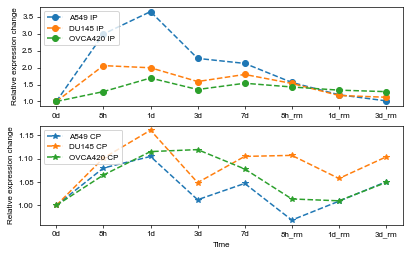

In [6]:
## Relative changes in the IP and CP expression level under TNF-alpha tretament
fig, axes = plt.subplots(2, 1, figsize=(6.5, 4))
axes[0].plot(final_df['TNF_A549_immuno'],'--o')
axes[0].plot(final_df['TNF_DU145_immuno'],'--o')
axes[0].plot(final_df['TNF_OVCA420_immuno'],'--o')

axes[1].plot(final_df['TNF_A549_const'],'--*')
axes[1].plot(final_df['TNF_DU145_const'],'--*')
axes[1].plot(final_df['TNF_OVCA420_const'],'--*')
axes[1].set_xlabel('Time')

axes[0].set_ylabel('Relative expression change')
axes[1].set_ylabel('Relative expression change')

axes[0].legend(['A549 IP','DU145 IP','OVCA420 IP'],loc='upper left')
axes[1].legend(['A549 CP','DU145 CP','OVCA420 CP'],loc='upper left')
#plt.savefig('plots/Cell_lines_TNF_treatement_IP_CP.svg',bbox_inches = "tight",dpi=500)
plt.show()

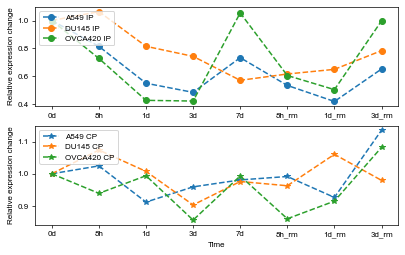

In [7]:
## Relative changes in the IP and CP expression level under TGFB1 treatment to the cell lines.
fig, axes = plt.subplots(2, 1, figsize=(6.5, 4))
axes[0].plot(final_df['TGFB1_A549_immuno'],'--o')
axes[0].plot(final_df['TGFB1_DU145_immuno'],'--o')
axes[0].plot(final_df['TGFB1_OVCA420_immuno'],'--o')

axes[1].plot(final_df['TGFB1_A549_const'],'--*') 
axes[1].plot(final_df['TGFB1_DU145_const'],'--*')
axes[1].plot(final_df['TGFB1_OVCA420_const'],'--*')

axes[1].set_xlabel('Time')
axes[0].set_ylabel('Relative expression change')
axes[1].set_ylabel('Relative expression change')
axes[0].legend(['A549 IP','DU145 IP','OVCA420 IP'],loc='upper left')
axes[1].legend(['A549 CP','DU145 CP','OVCA420 CP'],loc='upper left')
#plt.savefig('plots/Cell_lines_TGFB_treatement_IP_CP.svg',bbox_inches = "tight",dpi=500)
plt.show()

## Supplementary figure Cell line MCF7

In [8]:
## Importing MCF7 cell line data treated with TGFB1
gene_data_frame4=pd.read_csv(input_path3+'GSE147405_MCF7_TGFB1_TimeCourse_UMI_matrix.csv.gz',index_col=0)#
gene_data_frame4_df=gene_data_frame4
adata = sc.AnnData(gene_data_frame4_df.T)
X_norm = sc.pp.normalize_total(adata, target_sum=1, inplace=False)['X']
normdf=pd.DataFrame(X_norm,index=gene_data_frame4_df.T.index,columns=gene_data_frame4_df.T.columns)

gene_data_frame4ann=pd.read_csv(input_path3+'GSE147405_MCF7_TGFB1_TimeCourse_metadata.csv.gz',index_col=0)

temp=pd.merge(normdf,gene_data_frame4ann,left_index=True, right_index=True)
temp2=temp[['CellLine', 'Treatment', 'Time','PSMB8','PSMB9','PSMB10','PSMB5','PSMB6','PSMB7']].groupby(['Time']).mean()

re_index=['0d','8h','1d', '3d','7d','8h_rm','1d_rm','3d_rm']
temp3=temp2.reindex(re_index)

temp3['immunopeoteasome_avaerage']=(1/3)*(temp3['PSMB8']+temp3['PSMB9']+temp3['PSMB10'])
temp3['constitutive_proteasome_avaerage']=(1/3)*(temp3['PSMB5']+temp3['PSMB6']+temp3['PSMB7'])
temp3['immuno_proteasome_change_ratio']=temp3['immunopeoteasome_avaerage']/temp3['immunopeoteasome_avaerage'][0]
temp3['const_proteasome_change_ratio']=temp3['constitutive_proteasome_avaerage']/temp3['constitutive_proteasome_avaerage'][0]
temp3_MCF7_TGFB1=temp3

In [9]:
## Importing MCF7 cell line data treated with TNF-alpha
gene_data_frame4=pd.read_csv(input_path3+'GSE147405_MCF7_TNF_TimeCourse_UMI_matrix.csv.gz',index_col=0)#
gene_data_frame4_df=gene_data_frame4
adata = sc.AnnData(gene_data_frame4_df.T)
X_norm = sc.pp.normalize_total(adata, target_sum=1, inplace=False)['X']
normdf=pd.DataFrame(X_norm,index=gene_data_frame4_df.T.index,columns=gene_data_frame4_df.T.columns)

gene_data_frame4ann=pd.read_csv(input_path3+'GSE147405_MCF7_TNF_TimeCourse_metadata.csv.gz',index_col=0)
temp=pd.merge(normdf,gene_data_frame4ann,left_index=True, right_index=True)
temp2=temp[['CellLine', 'Treatment', 'Time','PSMB8','PSMB9','PSMB10','PSMB5','PSMB6','PSMB7']].groupby(['Time']).mean()
re_index=['0d','8h','1d', '3d','7d','8h_rm','1d_rm','3d_rm']
temp3=temp2.reindex(re_index)
temp3['immunopeoteasome_avaerage']=(1/3)*(temp3['PSMB8']+temp3['PSMB9']+temp3['PSMB10'])
temp3['constitutive_proteasome_avaerage']=(1/3)*(temp3['PSMB5']+temp3['PSMB6']+temp3['PSMB7'])
temp3['immuno_proteasome_change_ratio']=temp3['immunopeoteasome_avaerage']/temp3['immunopeoteasome_avaerage'][0]
temp3['const_proteasome_change_ratio']=temp3['constitutive_proteasome_avaerage']/temp3['constitutive_proteasome_avaerage'][0]
temp3_MCF7_TNF=temp3

In [10]:
temp3_MCF7_TNF_1=temp3_MCF7_TNF[['immuno_proteasome_change_ratio','const_proteasome_change_ratio']]
temp3_MCF7_TNF_1.columns=['TNF_MCF7_immuno','TNF_MCF7_const']

In [11]:
temp3_MCF7_TGFB1_1=temp3_MCF7_TGFB1[['immuno_proteasome_change_ratio','const_proteasome_change_ratio']]
temp3_MCF7_TGFB1_1.columns=['TGFB1_MCF7_immuno','TGFB1_MCF7_const']

In [12]:
final_df=pd.concat([temp3_MCF7_TNF_1,temp3_MCF7_TGFB1_1],axis=1)

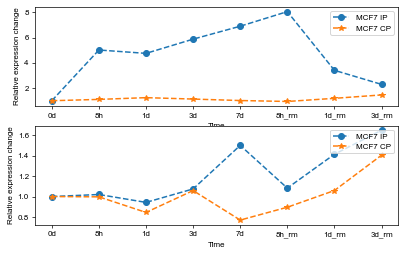

In [13]:
## Relative change in the IP and CP expression of MCF7 cell line on treatment with TNF-alpha and TGFB1
fig, axes = plt.subplots(2, 1, figsize=(6.5, 4))
axes[0].plot(final_df['TNF_MCF7_immuno'],'--o')
axes[0].plot(final_df['TNF_MCF7_const'],'--*')
axes[0].legend(['MCF7 IP','MCF7 CP'],loc='upper right')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Relative expression change')
axes[1].plot(final_df['TGFB1_MCF7_immuno'],'--o')
axes[1].plot(final_df['TGFB1_MCF7_const'],'--*')
axes[1].legend(['MCF7 IP','MCF7 CP'],loc='upper right')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Relative expression change')
#plt.savefig('plots/Combined_IP_CP_MCF7.svg',bbox_inches = "tight",dpi=500)
plt.show()